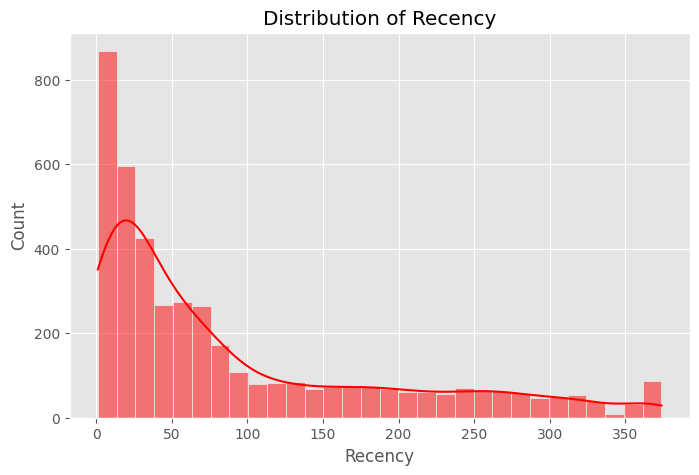

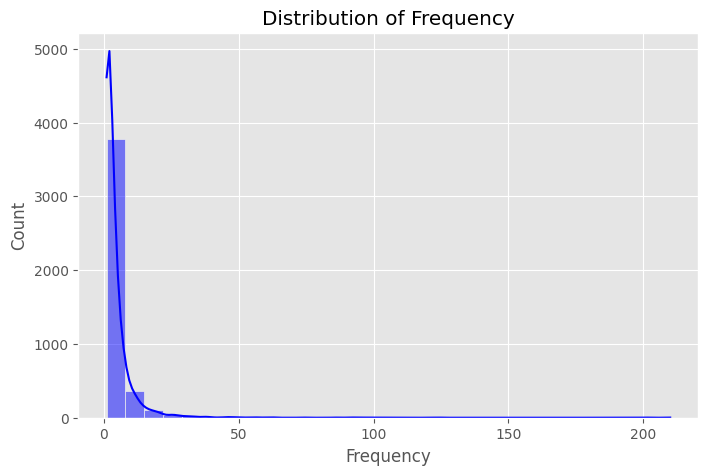

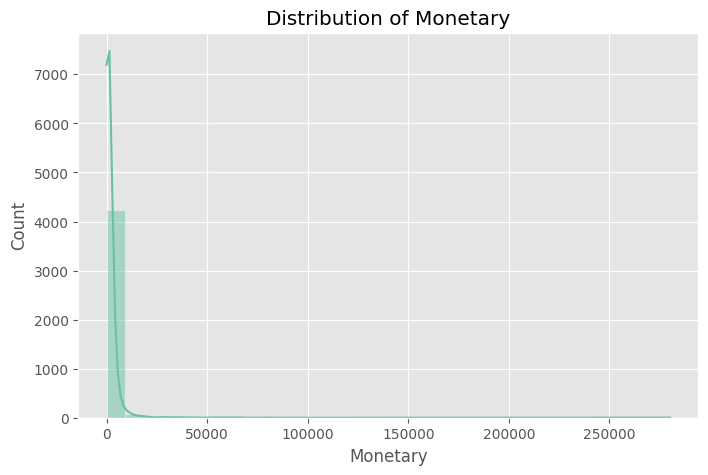

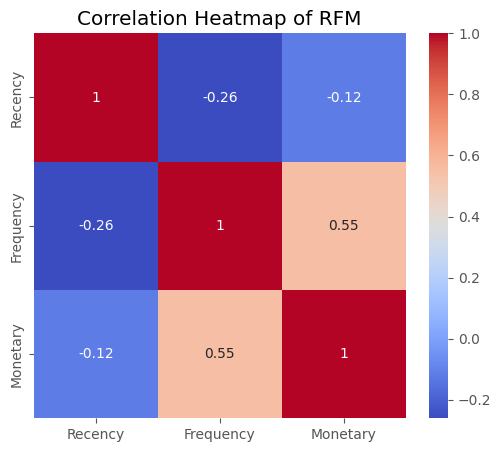

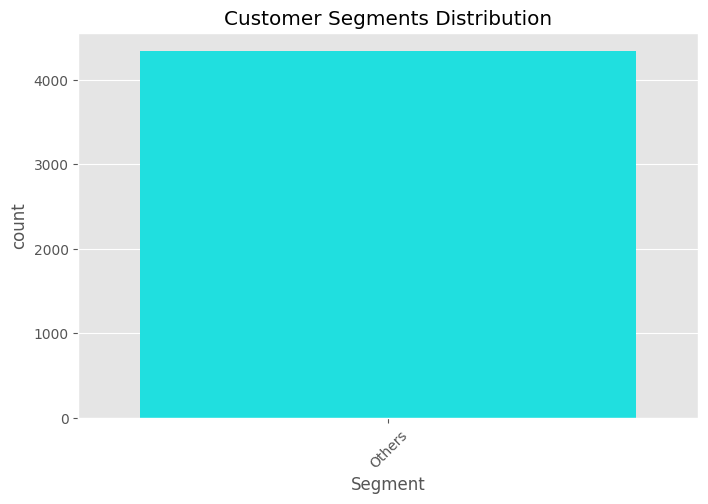

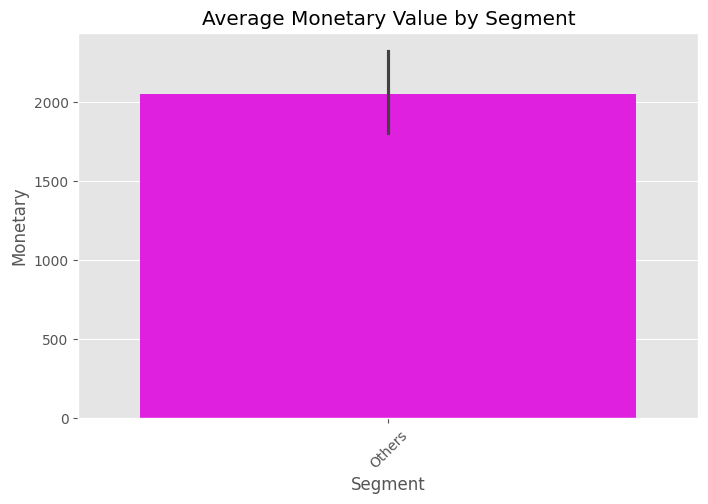

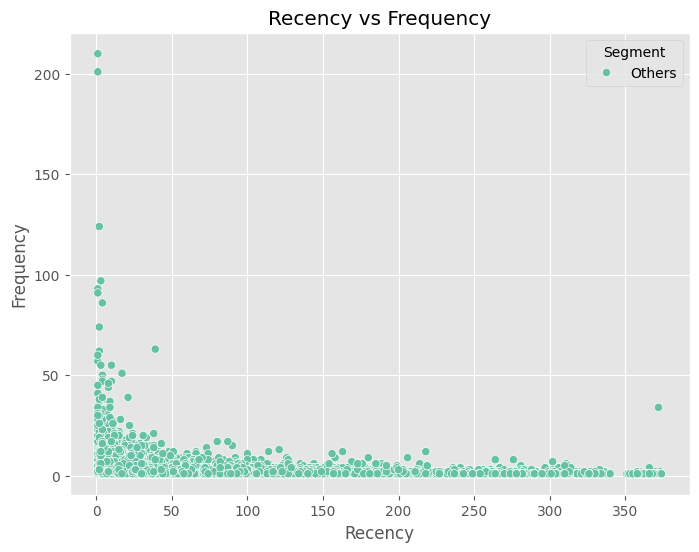

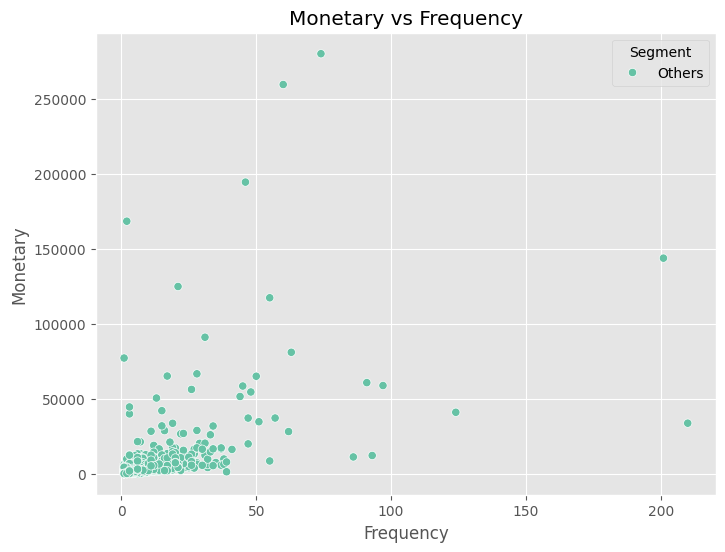

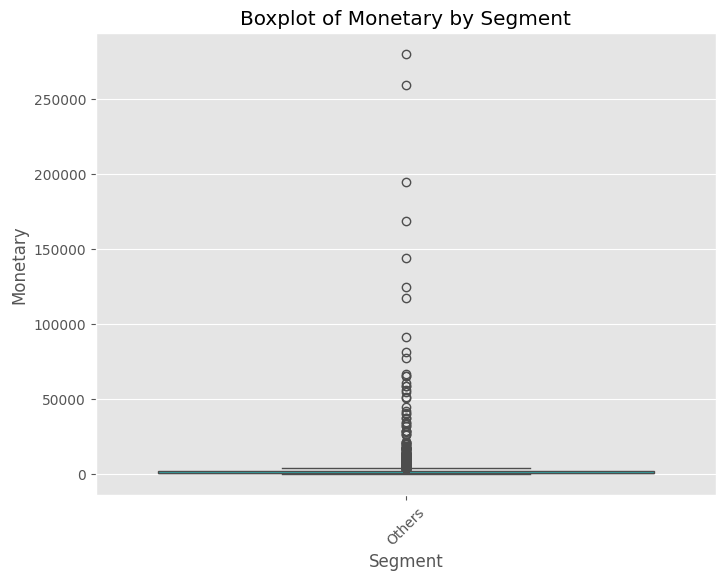

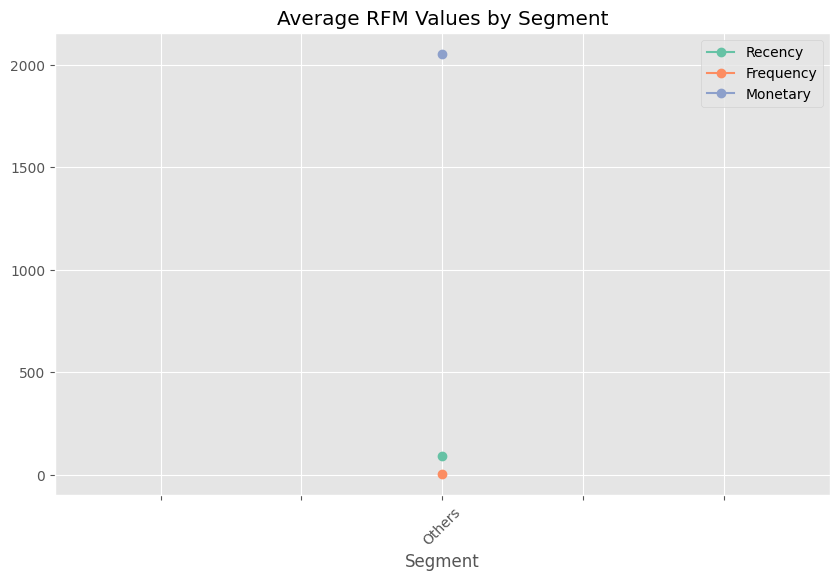

🔎 Key Insights:
- Champions are high-value customers, focus on loyalty programs.
- Loyal Customers buy frequently, offer memberships or subscriptions.
- Potential Loyalists need nurturing with discounts or personalized offers.
- At Risk customers require re-engagement campaigns (emails, promotions).
- Needs Attention group should get awareness campaigns.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. Plot settings
plt.style.use("ggplot")
sns.set_palette("Set2")

# 2. Load Dataset
df = pd.read_csv("C:/Users/Abdullah Umer/Desktop/Elevvo Pathways Internship/Task 2/OnlineRetail.csv", encoding="ISO-8859-1")



# 3. Data Cleaning
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']



# 4. RFM Metrics Calculation
# Reference date = 1 day after the last invoice date
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate RFM per customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                             # Frequency
    'TotalPrice': 'sum'                                 # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']



# 5. RFM Scoring
# Use quantiles to assign scores (1–5)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# Final RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)



# 6. Customer Segmentation
def segment_customer(df):
    if df['R_Score'] in ['4','5'] and df['F_Score'] in ['4','5'] and df['M_Score'] in ['4','5']:
        return 'Champions'
    elif df['R_Score'] in ['3','4','5'] and df['F_Score'] in ['3','4','5']:
        return 'Loyal Customers'
    elif df['R_Score'] in ['4','5'] and df['F_Score'] in ['1','2']:
        return 'Potential Loyalist'
    elif df['R_Score'] in ['2','3'] and df['F_Score'] in ['2','3']:
        return 'Needs Attention'
    elif df['R_Score'] in ['1','2'] and df['F_Score'] in ['1','2']:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)




# 7. Visualization Section

# 1. Distribution of Recency
plt.figure(figsize=(8,5))
sns.histplot(rfm['Recency'], bins=30, kde=True, color="red")
plt.title("Distribution of Recency")
plt.show()

# 2. Distribution of Frequency
plt.figure(figsize=(8,5))
sns.histplot(rfm['Frequency'], bins=30, kde=True, color="blue")
plt.title("Distribution of Frequency")
plt.show()

# 3. Distribution of Monetary
plt.figure(figsize=(8,5))
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title("Distribution of Monetary")
plt.show()

# 4. RFM Heatmap (correlation)
plt.figure(figsize=(6,5))
sns.heatmap(rfm[['Recency','Frequency','Monetary']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of RFM")
plt.show()

# 5. Customer Segments Count
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, color="cyan")
plt.title("Customer Segments Distribution")
plt.xticks(rotation=45)
plt.show()

# 6. Average Monetary by Segment
plt.figure(figsize=(8,5))
sns.barplot(data=rfm, x='Segment', y='Monetary', order=rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=False).index, color="magenta")
plt.title("Average Monetary Value by Segment")
plt.xticks(rotation=45)
plt.show()

# 7. Scatter plot (Recency vs Frequency)
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', color="blue")
plt.title("Recency vs Frequency")
plt.show()

# 8. Scatter plot (Monetary vs Frequency)
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', color="yellow")
plt.title("Monetary vs Frequency")
plt.show()

# 9. Boxplot of Monetary by Segment
plt.figure(figsize=(8,6))
sns.boxplot(data=rfm, x='Segment', y='Monetary', color="cyan")
plt.title("Boxplot of Monetary by Segment")
plt.xticks(rotation=45)
plt.show()

# 10. Line chart - Average RFM values by Segment
rfm_group = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean().reset_index()
rfm_group.set_index('Segment').plot(kind='line', marker='o', figsize=(10,6))
plt.title("Average RFM Values by Segment")
plt.xticks(rotation=45)
plt.show()



# 8. Insights
print("🔎 Key Insights:")
print("- Champions are high-value customers, focus on loyalty programs.")
print("- Loyal Customers buy frequently, offer memberships or subscriptions.")
print("- Potential Loyalists need nurturing with discounts or personalized offers.")
print("- At Risk customers require re-engagement campaigns (emails, promotions).")
print("- Needs Attention group should get awareness campaigns.")












